# 1. 군집분석을 이용한 문제 해결 

## 1) K-means 알고리즘 
* 서로 유사한 데이터는 동일 그룹으로, 유사하지 않은 데이터는 다른 그룹으로 분류하는 알고리즘, K(군집의 개수) 와 means(각 군집의 중심과 데이터들의 평균 거리, 군집 중심을 centroid로 칭함)로 구성됨.
* 데이터셋에서 K개의 centroids를 임시 지정한 뒤 각 데이터들을 가장 가까운 centroids가 속한 그룹에 할당, 다시 centroid 업데이트 후 centroid가 변하지 않을 때까지 반복함으로써 각 클러스터와 거리 차이의 분산을 최소화 하는 방식으로 동작함.


## 2) K-means 이용한 분석 수행 

### (1) 필요 패키지 임포트 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

### (2) 데이터 불러오기 

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

### (3) 데이터 살펴보기 

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### (4) 데이터 전처리 
* species 칼럼은 문자열이기 때문에 레이블 인코딩을 수행 

In [ ]:
from sklearn.preprocessing import LabelEncoder
df.species = LabelEncoder().fit_transform(df.species)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


* 클러스터링 결과를 비교하기 위해 원본 데이터프레임 복사 

In [ ]:
df_copy = df

### (5) 분석 데이터셋 준비 
* 데이터 특징 핵심인자 탐색을 위한 사전 시각화로 pairplot() 이용 

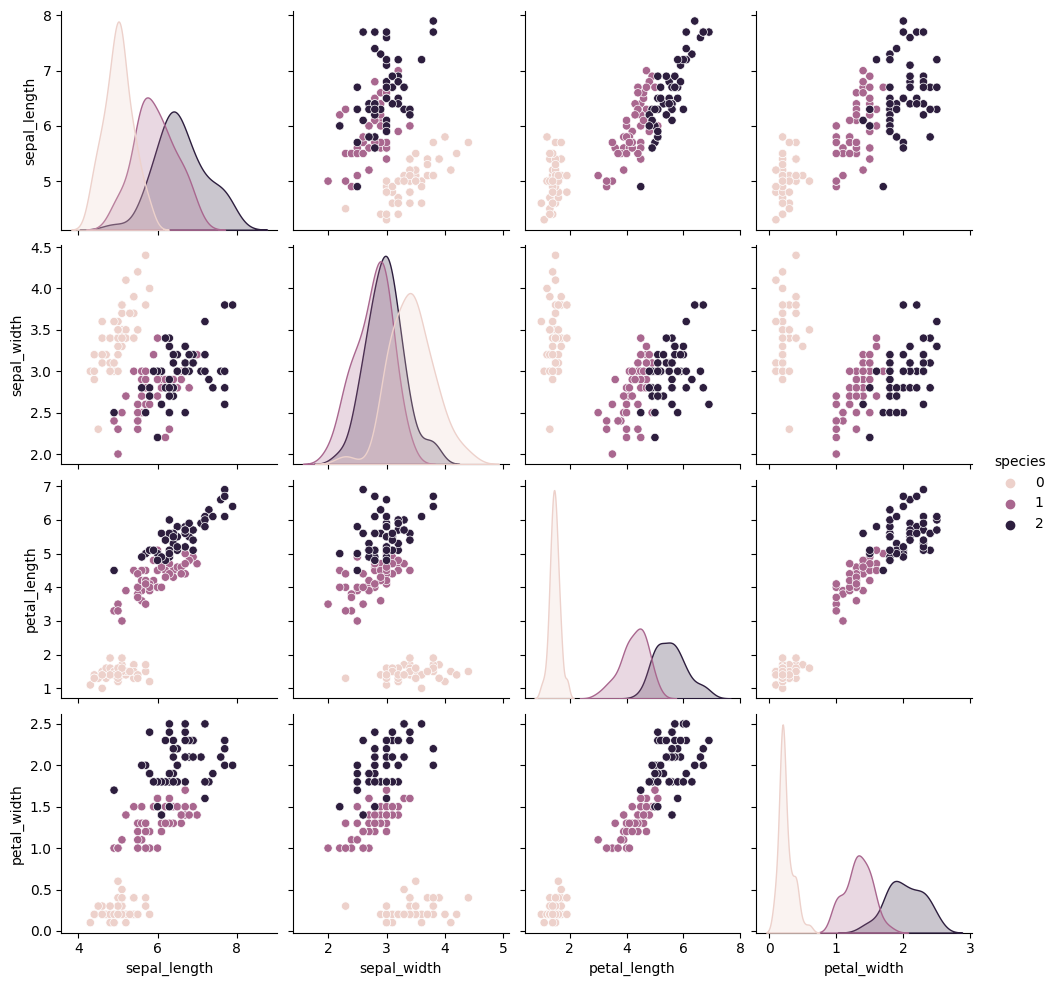

In [ ]:
import seaborn as sns
from matplotlib import pyplot as pyplot
from mpl_toolkits.mplot3d import Axes3D, proj3d

sns.pairplot(df, hue="species")
plt.show()

### (6) 데이터 분석 수행 

> KMeans 모델의 파라미터
* n-clusters: 클러스터 개수
* n_init: 초기 centroid 샘플링 횟수
* max_iter: K-means 알고리듬 반복횟수로 K가 큰 경우 1000 이상으로 조정
* random_state: 난수생성을 위한 seed
* algorithm: 사용할 알고리즘으로 보통 'auto' 로 지정 

In [ ]:
cluster1 = KMeans(n_clusters=3, n_init=10, max_iter=500, random_state=123, algorithm="auto")

cluster1.fit(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', max_iter=500, n_clusters=3, n_init=10,
       random_state=123)

In [ ]:
cluster_center = cluster1.cluster_centers_
cluster_prediction = cluster1.predict(df)
print(pd.DataFrame(cluster_center))
print(cluster_prediction)

          0         1         2         3         4
0  6.622449  2.983673  5.573469  2.032653  2.000000
1  5.006000  3.428000  1.462000  0.246000  0.000000
2  5.915686  2.764706  4.264706  1.333333  1.019608
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


-> 기존 데이터에 예측된 군집 결과 붙여서 출력하기 

In [ ]:
df_copy["cluster"] = cluster_prediction
df_copy

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


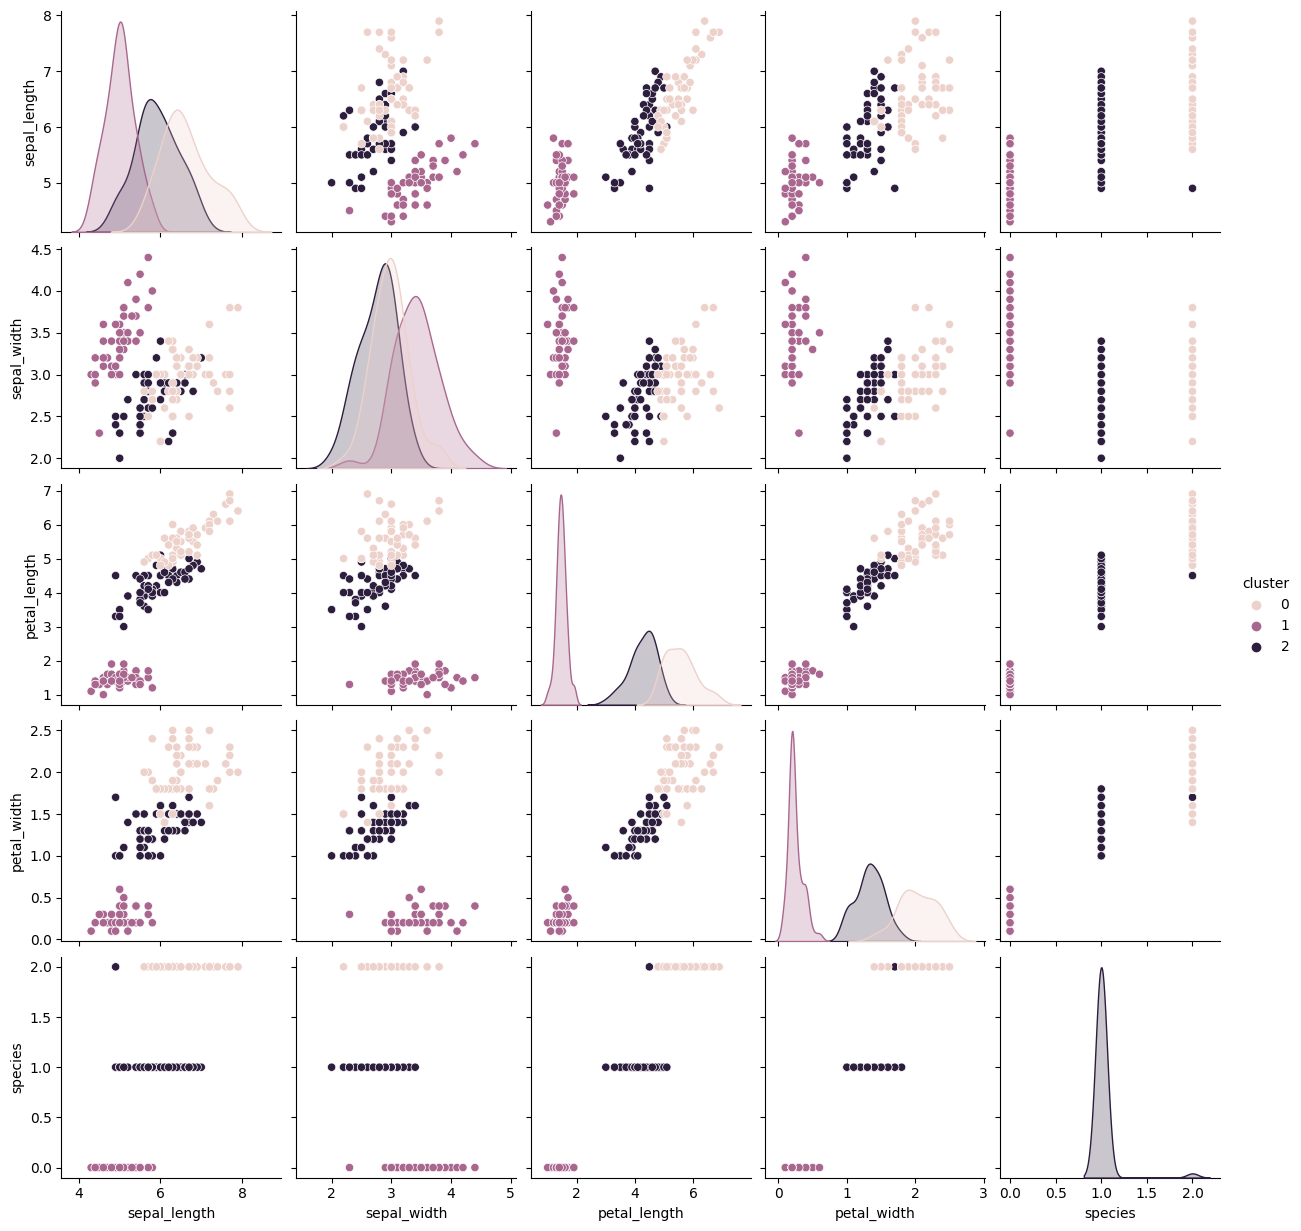

In [ ]:
sns.pairplot(df_copy, hue="cluster")
plt.show()

### (7) 성능평가 및 시각화 

* 비지도학습인 K-means는 실제 정답이 없으므로 일반적인 성능 평가 대신 적절한 K개를 설정하였는지 평가할 수 있다.
* inertia는 각 군집별 오차의 제곱의 합으로 군집 내 분산으로 정의할 수 있는데 일반적으로 K가 증가하게 되면 샘플이 할당된 centroid에 근접하므로 inertia가 감소하게 된다. elbow 기법은 inertia가 빠르게 줄어든 변화시점을 최적의 K로 설정하는 방법이다.
* K의 개수와 inertia 비교시각화로 K=3일 때가 빠르게 줄어들기 시작한 시점임을 알 수 있다.


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

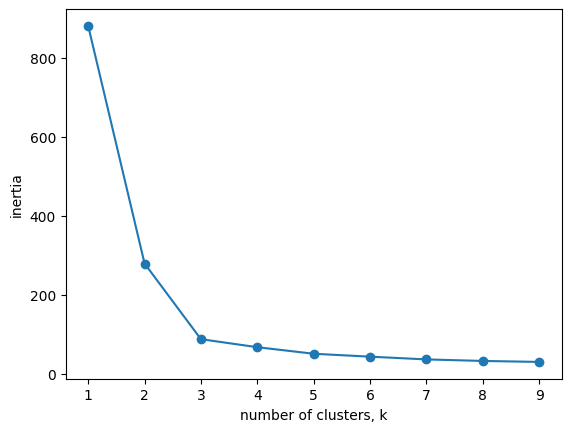

In [ ]:
scope = range(1,10)
inertias = []

for k in scope:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)

plt.plot(scope, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

# 2. 연관분석을 이용한 문제 해결 

## 1) 연관분석 알고리즘

* 연관분석은 하나의 거래나 사건에 포함된 항목 간의 관련성을 파악하여 둘 이상의 항목들로 구성된 연관성 규칙을 도출한다. 
* 장바구니 분석으로 알려져 있으며 연관성을 찾아내기 위해서는 연관성을 비교할 수 있는 규칙이 필요한데 규칙을 발견하기 위해 지지도, 신뢰도, 향상도를 평가 척도로 사용한다. 

> 지지도
* A와 B를 모두 포함하는 경우의 확률로 클수록 관련도가 높다.
$$support(A ⇒ B) = P(A ∩ B)$$

> 신뢰도
* A를 포함하는 경우에서 B를 포함하는 경우 수로 클수록 관련도가 높다.
$$confidencs(A ⇒ B) = P(B|A) = \frac{P(A∩B)}{P(A)}$$

> 향상도
* 임의로 B가 포함되는 경우에 비해 A와의 관계가 고려되어 포함되는 경우의 비율이다.
$$lift(A⇒B)=\frac{confidence(A⇒B)}{P(B)}=\frac{P(A∩B)}{P(A)P(B)}$$
* 향상도가 1이 넘어가면 관련도가 있다고 할 수 있다. 

## 2) 연관분석 이용한 분석 수행

* Apriori 알고리즘으로 연관분석 적용

### (1) 필요 패키지 임포트

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules

### (2) 데이터 불러오기 

In [56]:
df = pd.read_csv("retail_dataset.csv")

### (3) 데이터 살펴보기

In [18]:
df

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
310,Bread,Eggs,Cheese,NaN,NaN,NaN,NaN
311,Meat,Milk,Pencil,NaN,NaN,NaN,NaN
312,Bread,Cheese,Eggs,Meat,Pencil,Diaper,Wine
313,Meat,Cheese,NaN,NaN,NaN,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       315 non-null    object
 1   1       285 non-null    object
 2   2       245 non-null    object
 3   3       187 non-null    object
 4   4       133 non-null    object
 5   5       71 non-null     object
 6   6       41 non-null     object
dtypes: object(7)
memory usage: 17.4+ KB


### (4) 데이터 전처리
* 장바구니 목록 값을 수치로 표현하기 위하여 각 항목당 매칭될 경우 1로 아니면 0으로 표시한다(원-핫 인코딩 처리).

In [51]:
# 장바구니 고유항목 구분 출력
items = set()
for col in df:
    items.update(df[col].unique())

# 장바구니 목록 값을 수치로 표현 - 각 항목당 매칭될 경우 1로, 아니면 0으로 표시
itemset = set(items)
encoding = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    dismatching = list(itemset - rowset)
    matching = list(itemset.intersection(rowset))
    for i in dismatching:
        labels[i] = 0
    for j in matching:
        labels[j] = 1
    encoding.append(labels)

result = pd.DataFrame(encoding)

result

,NaN,Milk,Bagel,Wine,Meat,Cheese,Pencil,Diaper,Bread,Eggs
0,0,0,0,1,1,1,1,1,1,1
1,0,1,0,1,1,1,1,1,1,0
2,1,1,0,1,1,1,0,0,0,1
3,1,1,0,1,1,1,0,0,0,1
4,1,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
310,1,0,0,0,0,1,0,0,1,1
311,1,1,0,0,1,0,1,0,0,0
312,0,0,0,1,1,1,1,1,1,1
313,1,0,0,0,1,1,0,0,0,0


* 다른 방법

In [58]:
df2 = pd.read_csv("retail_dataset.csv")

In [71]:
from mlxtend.preprocessing import TransactionEncoder

df2.fillna("", inplace=True)

df2["items_str"] = df2["0"]
for col in df2.columns[1:7]:
    df2["items_str"] += " " + df2[col]

df2["items_str"] = df2["items_str"].str.strip()

dataset = list(df2.items_str.str.split(" "))
te = TransactionEncoder()
te_result = te.fit(dataset).transform(dataset)
result2 = pd.DataFrame(te_result, columns=te.columns_)
result2

,Bagel,Bread,Cheese,Diaper,Eggs,Meat,Milk,Pencil,Wine
0,False,True,True,True,True,True,False,True,True
1,False,True,True,True,False,True,True,True,True
2,False,False,True,False,True,True,True,False,True
3,False,False,True,False,True,True,True,False,True
4,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...
310,False,True,True,False,True,False,False,False,False
311,False,False,False,False,False,True,True,True,False
312,False,True,True,True,True,True,False,True,True
313,False,False,True,False,False,True,False,False,False


### (5) 분석 데이터셋 준비
* NaN 칼럼 삭제

In [72]:
result = result.drop(result.columns[0], axis=1)
result

,Milk,Bagel,Wine,Meat,Cheese,Pencil,Diaper,Bread,Eggs
0,0,0,1,1,1,1,1,1,1
1,1,0,1,1,1,1,1,1,0
2,1,0,1,1,1,0,0,0,1
3,1,0,1,1,1,0,0,0,1
4,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
310,0,0,0,0,1,0,0,1,1
311,1,0,0,1,0,1,0,0,0
312,0,0,1,1,1,1,1,1,1
313,0,0,0,1,1,0,0,0,0


### (6) 데이터분석 수행

In [78]:
freq_items = apriori(result, min_support=0.2, use_colnames=True)

rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.sort_values("lift")

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
1,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
3,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
9,"(Cheese, Meat)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845
6,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
2,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
4,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
5,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
7,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
8,"(Cheese, Milk)",(Meat),0.304762,0.476190,0.203175,0.666667,1.400000,0.058050,1.571429


In [77]:
freq_item2 = apriori(result2, min_support=0.2, use_colnames=True)

rules2 = association_rules(freq_item2, metric="confidence", min_threshold=0.6)
rules2.sort_values("lift")

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
5,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
6,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
12,"(Cheese, Meat)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845
7,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
2,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
3,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
1,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
11,"(Cheese, Milk)",(Meat),0.304762,0.476190,0.203175,0.666667,1.400000,0.058050,1.571429
